# Experiment data

### Date started:
17 March 2024

### Authors:
Luca Mircea & Theo Trausan

### Premise:
We have some data related to an experiment performed on a few human subjects, with test and control groups, and we'd like to have a look at the data, test the assumptions of linear regression as we also understand them on the abstract level, and then we will check if the experiment was succesful or not


In [1]:
import pandas as pd

In [2]:
experiment = pd.read_csv('measurements.csv')

experiment.head(10)

,ID,group,sex,birth_year,chol_init,chol_final,trig_init,trig_final,weight_init,weight_final,...,hip_perimeter_diff,BMI_init,BMI_final,BMI_diff,tricipital_fold_final,tricipital_fold_init,abdominal_fold_final,abdominal_fold_init,subscapular_fold_final,subscapular_fold_init
0,t1,Test,f,2010.0,183.0,177.0,74.0,68.0,69.5,69.0,...,-1,27.840090,25.039919,-2.800171,23.0,19.0,19.0,19.0,10.0,10.0
1,t2,Test,m,2010.0,185.0,179.0,88.0,81.0,70.0,71.9,...,-2,28.398718,25.780774,-2.617944,23.0,23.0,40.0,42.0,20.0,17.0
2,t3,Test,f,2010.0,185.0,180.0,85.0,74.0,66.8,74.5,...,3,27.449047,26.084521,-1.364526,11.0,20.0,26.0,20.0,22.0,20.0
3,t4,Test,f,2011.0,188.0,178.0,96.0,89.0,63.1,70.2,...,9,27.674225,27.421875,-0.252350,18.0,20.0,10.0,40.0,0.9,12.0
4,t5,Test,m,2011.0,188.0,183.0,83.0,78.0,57.9,63.2,...,-3,27.162695,26.648676,-0.514019,10.0,31.0,19.0,31.0,0.8,21.0
5,t6,Test,m,2009.0,175.0,169.0,86.0,81.0,59.4,58.0,...,-2,26.755552,22.942130,-3.813421,28.0,19.0,40.0,42.0,28.0,21.0
6,t7,Test,m,2010.0,174.0,168.0,96.0,87.0,49.9,54.1,...,-4,25.826821,21.132812,-4.694008,10.0,20.0,0.8,50.0,0.8,30.0
7,t8,Test,f,2010.0,178.0,172.0,88.0,81.0,62.3,59.0,...,14,27.688889,22.206331,-5.482558,20.0,21.0,10.0,10.0,11.0,7.0
8,t9,Test,m,2010.0,182.0,176.0,91.0,83.0,73.3,78.0,...,3,30.119987,27.968016,-2.151971,30.0,20.0,33.0,50.0,21.0,29.0
9,t10,Test,f,2011.0,178.0,173.0,75.0,69.0,67.0,65.0,...,3,26.838648,24.167162,-2.671485,30.0,20.0,38.0,29.0,30.0,10.0


In [3]:
# now we have the data in, and it also looks like it's already in float, so it's ready to use. Let's make
# some violin plots to get a first look
import seaborn as sns

<Axes: xlabel='sex', ylabel='weight_init'>

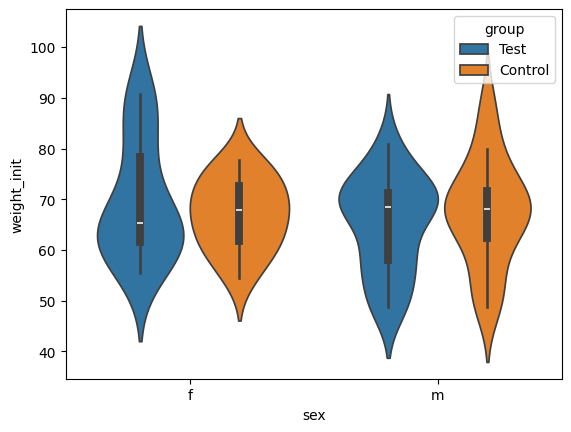

In [4]:
sns.violinplot(data=experiment, x="sex", y="weight_init", hue="group")

<Axes: xlabel='sex', ylabel='weight_final'>

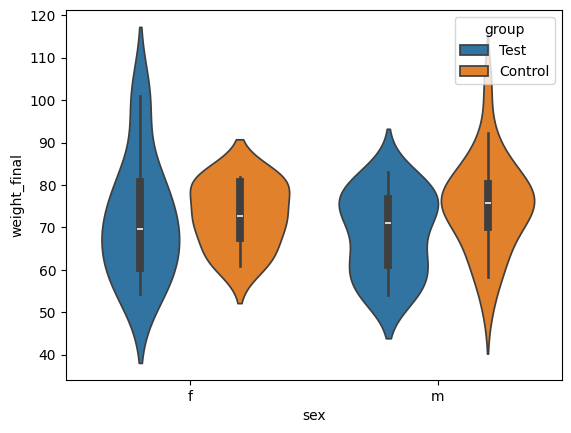

In [5]:
sns.violinplot(data=experiment, x="sex", y="weight_final", hue="group")

In [6]:
# hypothesis to test: the experiment seems to have worked for men

<Axes: xlabel='sex', ylabel='BMI_init'>

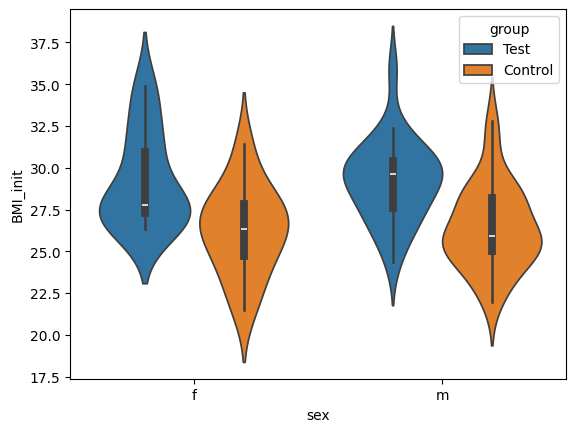

In [7]:
sns.violinplot(data=experiment, x="sex", y="BMI_init",hue="group")

<Axes: xlabel='sex', ylabel='BMI_final'>

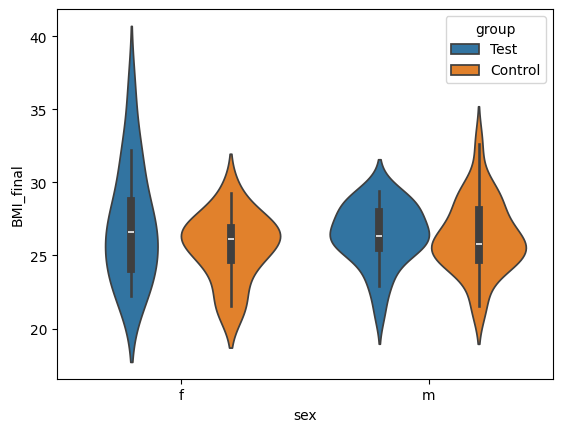

In [8]:
sns.violinplot(data=experiment, x="sex", y="BMI_final",hue="group")

In [9]:
# now that we've had a look at the data to see how it's distributed and what we have available, it's time to 
# start testing things:
# 1. we will check if the averages of cholesterol initial and final are statistically significantly different (in total, and by gender)
# 2. we want to see if the experiment has had an impact on BMI & other metrics like hip perimeter and weight, with control variables
# 2.1 to do point 2 we need to test the regression assumptions and we'll take the time to discuss them also

In [10]:
# test if average cholesterol initial and final are different at a statistically significant level. For this purpose, we will
# plot the two densities side by side, and then run a statistical test

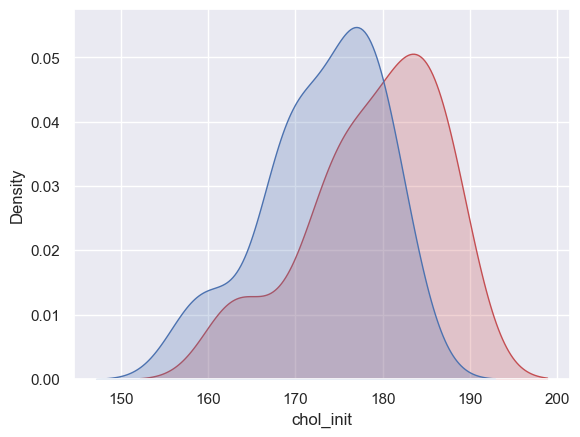

In [11]:
import matplotlib.pyplot as plt 
sns.set_theme(style="darkgrid")
 
fig = sns.kdeplot(experiment['chol_init'], fill=True, color="r")
fig = sns.kdeplot(experiment['chol_final'], fill=True, color="b")
plt.show()

In [12]:
# wow, the difference is striking, and suggests that the experiment worked

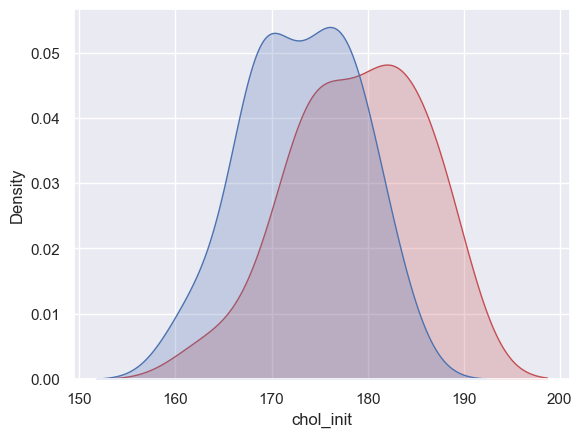

In [13]:
# let's see if this also holds if we split the data by gender

# Males
fig = sns.kdeplot(experiment['chol_init'][experiment['sex'] == 'm'], fill=True, color="r")
fig = sns.kdeplot(experiment['chol_final'][experiment['sex'] == 'm'], fill=True, color="b")
plt.show()

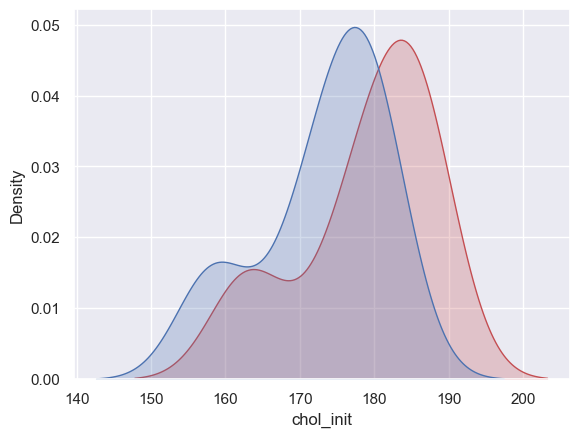

In [14]:
# Males
fig = sns.kdeplot(experiment['chol_init'][experiment['sex'] == 'f'], fill=True, color="r")
fig = sns.kdeplot(experiment['chol_final'][experiment['sex'] == 'f'], fill=True, color="b")
plt.show()

In [15]:
# the results are the same, whether we're looking at males or females => strongly suggests that the result is accurate

In [16]:
# we'll apply the paired t-test to check if the before-and-after states are different
# see https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/
import scipy.stats as stats

In [17]:
stats.ttest_rel(experiment['chol_init'][~pd.isnull(experiment['chol_init'])], experiment['chol_final'][~pd.isnull(experiment['chol_init'])])

TtestResult(statistic=15.44905555532676, pvalue=3.248017323055811e-18, df=39)

In [18]:
# the result is highly significant, which means that the pre and post experiment states are different
# however, we are not 100% sure about how well the test works with non-normally distributed data, so we'll
# also run it for the males only, as their values seem more normally distributed.

stats.ttest_rel(experiment['chol_init'][(~pd.isnull(experiment['chol_init'])) & (experiment['sex'] == 'm')], experiment['chol_final'][(~pd.isnull(experiment['chol_init'])) & (experiment['sex'] == 'm')])

TtestResult(statistic=10.121983276737097, pvalue=6.078385573967254e-10, df=23)

In [19]:
# still very strongly signficant even for the (normally distributed) males, so the experiment seems to have worked.

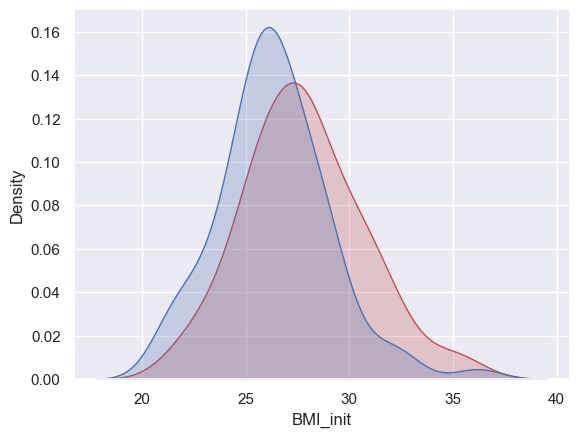

In [20]:
# out of curiosity, let's also look at BMI initial and final
fig = sns.kdeplot(experiment['BMI_init'], fill=True, color="r")
fig = sns.kdeplot(experiment['BMI_final'], fill=True, color="b")
plt.show()

In [21]:
# BMI is very nicely distributed, looks a lot like normal distribution;
# the before and after distributions seem to have different means, let's also apply the t-test

# this one is for the test group only
stats.ttest_rel(experiment['BMI_init'][~pd.isnull(experiment['chol_init'])], experiment['BMI_final'][~pd.isnull(experiment['chol_init'])])

TtestResult(statistic=8.353600794197924, pvalue=3.2146770117224233e-10, df=39)

In [22]:
# the before and after the treatment BMI is different for the test subjects

# now let's do it for the control group
stats.ttest_rel(experiment['BMI_init'][pd.isnull(experiment['chol_init'])], experiment['BMI_final'][pd.isnull(experiment['chol_init'])])

TtestResult(statistic=1.527570902318124, pvalue=0.1346896316309495, df=39)

In [23]:
# the test is not significant for the control group! This is the first strong piece of evidence that the experiment worked well!

In [24]:
# we are very happy with the results so far, it's looking like the experiment worked, because we see
# a difference between the before and after values for the test group, but not for the control group when
# using a paired t-test;
# however, as an extra measure, we will also check the results via regression because this allows us to account for control variables
# very effectively

In [25]:
import statsmodels.formula.api as smf

In [26]:
mod = smf.ols('BMI_final ~ group + sex + BMI_init', data=experiment)
res = mod.fit()

mod_with_robust_errors = res.get_robustcov_results(cov_type='HC1', use_t=None)
print(mod_with_robust_errors.summary())

                            OLS Regression Results                            
Dep. Variable:              BMI_final   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     24.59
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.19e-11
Time:                        21:20:31   Log-Likelihood:                -152.63
No. Observations:                  80   AIC:                             313.3
Df Residuals:                      76   BIC:                             322.8
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3838      2.525      1.736

### Interpreting the regression results

The group variable got a statistically significant coefficient, which means it is different from 0; and it suggests that the Test group saw a decrease in their BMI of approximately 1.67. The result seems to be independent of the sex, as the coefficient for that variable is not statistically sifnificantly different from 0. The initial BMI is also significant, which is to be expected from such an important control variable

In [27]:
#experiment_diff = experiment.copy()
#experiment_diff['BMI_diff'] = experiment_diff['BMI_final'] - experiment_diff[]

mod = smf.ols('BMI_diff ~ group + sex + 0', data=experiment)
res = mod.fit()

mod_with_robust_errors = res.get_robustcov_results(cov_type='HC1', use_t=None)
print(mod_with_robust_errors.summary())

                            OLS Regression Results                            
Dep. Variable:               BMI_diff   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                nan
Time:                        21:20:31   Log-Likelihood:                -155.54
No. Observations:                  80   AIC:                             317.1
Df Residuals:                      77   BIC:                             324.2
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
group[Control]    -0.3082      0.394     -0.

In [28]:
# it's interesting to see that we must account for the difference between final and initial in order to see the experiment results

# the regression on BMI diff yields a statistically significant coefficient for Test even with the constant set to 0, unlike the regression
# with BMI_final as the dependent variable. The estimated coefficient is quite large between both regressions, which is also interesting to note.
# In the BMI_final version of the regression, the intercept is not significant, even though its exculsion renders the one for Test also insignificant,
# and this version shows a much higher Rsq. Whatever the differences between the two versions, both suggest the experiment was successful

In [29]:
# "homework" check if the assumptions of linear regression hold: https://www.upgrad.com/blog/assumptions-of-linear-regression/

# 1. linear relationship: plot BMI_final as scatterplot together with BMI_initial (y = BMI_final & x = BMI_initial) 
    # and with Control/Test, and with sex
# 2. No auto-correlation or independence - this assumption does not apply in this case because we are not working with time series data, so skip
# 3. No Multicollinearity: check the correlation between BMI_final, BMI_init, BMI_diff, sex, and control and make sure none of them are too high
    # also try to apply what they say in the link above with the VIF
# 4. Homoscedasticity: apply heteroskedasticity tests (we're actually fine, we ran the test with robust standard errors, and it's still
    # significant, but it would be interesting to see anyhow). Make sure you use this on the residuals from the estimation without robust std. errors!
# 5. Normal distribution of error terms - plot the residuals (you can do so for both the simple and the robust standard error version of the regression)
    # and see if they are normally distributed; you can also apply a statistical test to check if it is a normal distribution